In [1]:
import math
import datasets
import IBM1 as ibm1
import debug_helpers
import variational as var
import persistence as per
import convergence_criterion as cc
import evaluate 
import plots

# pretty print variabeles on line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Run variational bayes for a toy example 
iterations = 10 
alpha = 0.1 
ELBO = True
s_t_pairs, s_vocabulary, t_vocabulary = datasets.example_data_null_words()
print(s_t_pairs[0])
val_sentence_pairs = [(
['<NULL>', 'Buch', 'klein', 'das', 'Haus'],
['the', 'small', 'house', 'book']
)]
ref_alignments = [[
{(3, 1), (2, 2), (4, 3), (1, 4)},
{(3, 1), (2, 2), (4, 3), (1, 4)}
]]
(lprobs, ELBOS, AERS) = var.EM(s_t_pairs, s_vocabulary, t_vocabulary,iterations,val_sentence_pairs,
                ref_alignments, alpha, ELBO,fn_debug = debug_helpers.print_ELBO)

In [ ]:
# Read in the data 

# s_t_pairs, s_vocabulary, t_vocabulary = datasets.training_data()
# val_sentence_pairs = datasets.validation_data(s_vocabulary, t_vocabulary)
# reference_alignments = datasets.validation_alignments()

In [ ]:
import persistence as per
# Save the data 
# per.save(val_sentence_pairs, 'val_sent_pair')
# per.save(reference_alignments, 'val_ref_align')
# per.save(s_t_pairs, 's_t_pairs')
# per.save(s_vocabulary, 's_voc')
# per.save(t_vocabulary, 't_voc')
# Load the data 
ref_alignments = per.load('val_ref_align')
val_sentence_pairs = per.load('val_sent_pair')
s_t_pairs = per.load('s_t_pairs')
s_voc = per.load('s_voc')
t_voc = per.load('t_voc')

In [ ]:
# Read subset of data 
# subset = True
# size = 20000
# s_t_pairs, s_vocabulary, t_vocabulary = datasets.training_data(subset, size)
# per.save(s_t_pairs, 's_t_pairs_sub')
# per.save(s_vocabulary, 's_voc_sub')
# per.save(t_vocabulary, 't_voc_sub')
s_t_pairs_sub = per.load('s_t_pairs_sub')
s_voc_sub = per.load('s_voc_sub')
t_voc_sub = per.load('t_voc_sub')

In [ ]:
iterations = 10
alpha = [0.1, 0.01, 0.001] 
ELBO = False 
(lprobs, ELBOS, AERS_0) = var.EM(s_t_pairs, s_voc, t_voc,iterations,val_sentence_pairs,
                ref_alignments, alpha[0], ELBO,fn_debug = debug_helpers.print_ELBO)
# per.save(AERS_0, 'alpha_0')
print('alpha 0 done')

(lprobs, ELBOS, AERS_1) = var.EM(s_t_pairs, s_voc, t_voc,iterations,val_sentence_pairs,
                ref_alignments, alpha[1], ELBO,fn_debug = debug_helpers.print_ELBO)
# per.save(AERS_1, 'alpha_1')
print('alpha 1 done')

(lprobs, ELBOS, AERS_2) = var.EM(s_t_pairs, s_voc, t_voc,iterations,val_sentence_pairs,
                ref_alignments, alpha[2], ELBO,fn_debug = debug_helpers.print_ELBO)
# per.save(AERS_2, 'alpha_2')
print('alpha 2 done')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text xticklabel objects>)

(array([0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39]),
 <a list of 8 Text yticklabel objects>)

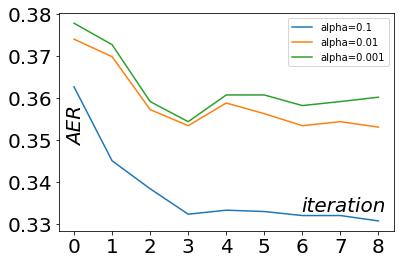

In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
ax = figure().gca()
alpha0 = per.load('alpha_0')
alpha1 = per.load('alpha_1')
alpha2 = per.load('alpha_2')
a = plt.plot(alpha0[1:], label='alpha=0.1')
b = plt.plot(alpha1[1:], label='alpha=0.01')
c = plt.plot(alpha2[1:], label='alpha=0.001')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_label_coords(0.08, 0.5)
ax.xaxis.set_label_coords(0.85, 0.16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
_ = plt.ylabel('AER ', fontsize=20, fontstyle = 'oblique')
_ = plt.xlabel('iteration', fontsize=20, fontstyle = 'oblique')
plt.legend()
plt.savefig('diffalpha')
# plt.show()

In [ ]:

# AER_scores = {}
# llhood_scores = {}

# def fname_ibm1_var(fname):
#     return f'IBM1_var_output/{fname}'

# def save_selected_models(i, llhood, AER, prev_llhood, prev_AER,
#                       lprobs, mname):
#     if prev_AER and (mname not in AER_scores) and cc.has_converged_AER(prev_AER, AER):
#         per.save_ibm1_model(lprobs,fname_ibm1_var(f'params_{mname}_AER_{i}.txt'))
#         AER_scores[mname] = AER
#     if prev_llhood and (mname not in llhood_scores) and cc.has_converged_LLhood(prev_llhood, llhood):
#         per.save_ibm1_model(lprobs, fname_ibm1_var(f'params_{mname}_llhood_{i}.txt'))
#         llhood_scores[mname] = llhood
        
        
# iterations = 15
# alpha = [0.1, 0.01, 0.001] 
# ELBO = True
# (lprobs, ELBOS, AERs) = var.EM(s_t_pairs_sub, s_voc_sub, t_voc_sub,iterations,val_sentence_pairs,
#                 ref_alignments, alpha[0], ELBO,debug_helpers.print_ELBO, save_selected_models, 'ibm1-var')

# # store AER and elbos scores in file
# per.save(AERs, fname_ibm1_var(f'AERs.txt'))
# per.save(ELBOS, fname_ibm1_var(f'elbos.txt'))

# # select models based on AER and llhood selection criterion
# selected_model_AER = fname_ibm1_var(cc.select_model_AER(AERs))
# selected_model_llhood = fname_ibm1_var(cc.select_model_LLhood(ELBOS))
# print(f'model selected on AER:', selected_model_AER)
# print(f'model selected on LLhood:', selected_model_llhood)

In [ ]:
# per.save_ibm1_model(lprobs,fname_ibm1_var(f'params__ELBO_{14}.txt'))

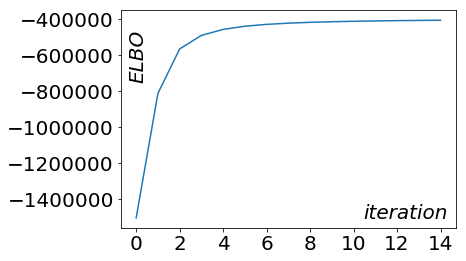

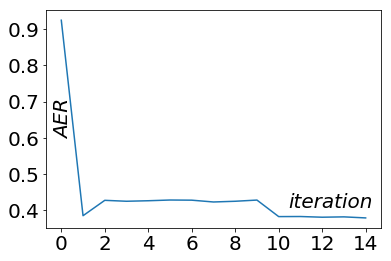

In [20]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator

def figure_elbo(log_lhoods, fname=None, selected_iteration = None):
    ax = figure().gca()
    _ = plt.plot(log_lhoods)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_label_coords(0.08, 0.79)
    ax.xaxis.set_label_coords(0.85, 0.11)
    ax.yaxis.get_offset_text().set_fontsize(20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    _ = plt.ylabel('ELBO', fontsize=20, fontstyle = 'oblique')
    _ = plt.xlabel('iteration', fontsize=20, fontstyle = 'oblique')
    if selected_iteration:
        plt.scatter([selected_iteration],[log_lhoods[selected_iteration]], s=50)
    if fname:
         _ = plt.savefig(fname)
    _ = plt.show()

import plots
elbo_txt = per.load(fname_ibm1_var(f'elbos.txt'))
aers_txt = per.load(fname_ibm1_var('AERs.txt'))
figure_elbo(elbo_txt, fname_ibm1_var('IBM1_var_elbo.png'))
plots.figure_AER(aers_txt, fname_ibm1_var('IBM1_var_AER.png'))



In [2]:
def fname_ibm1_var(fname):
    return f'IBM1_var_output/{fname}'
# EVALUATION 

# test_pairs = datasets.test_data(s_voc, t_voc)
# per.save(test_pairs, 'test_pairs_var')
test_pairs = per.load('test_pairs_var')

# elbos 
aer_model_var = per.load_ibm1_model(fname_ibm1_var('params__ELBO_14.txt'))
alignments = var.align(aer_model_var, test_pairs)
evaluate.evaluate_alignments_testset('elbo-IBM1-var', alignments)    

# aer 
# model_name = 'AER-IBM1-var'
# path_answers = 'testing/answers/test.wa.nonullalign'
# path_alignments = f'{model_name}.nonullalign'
# evaluate.check_naacl_format(path_alignments)
# evaluate.evaluate_naacl_alignments(path_answers, path_alignments)


File generated: elbo-IBM1-var.nonullalign.
Look in terminal to check if --elbo-IBM1-var.nonullalign-- is in NAACL format...
Look in terminal to see AER scores...
